In [112]:
# Загрузите данные и выведите информацию о них.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

url = "https://raw.githubusercontent.com/kroschenko/BelHard_DS/main/datasets/heart.csv"
df = pd.read_csv(url)



In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
#Разделение датафрейма на обучающую и тестовую выбори
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train.value_counts()


1    133
0    109
Name: target, dtype: int64

In [115]:
#Модель наивного байесовского классификатора. Построение матрицы ошибок
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
print(f"Количество ошибок в классификации - {(y_test != y_pred).sum()} из {X_test.shape[0]}")
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(cm)

Количество ошибок в классификации - 8 из 61
Матрица ошибок:
[[26  3]
 [ 5 27]]


In [116]:
#Расчет показателей accuracy, precision, recall, F1-dcore
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность модели на тестовой выборке (Accuracy) = {accuracy:.4f}\n")
print(classification_report(y_test, y_pred))


Точность модели на тестовой выборке (Accuracy) = 0.8689

             precision    recall  f1-score   support

          0       0.84      0.90      0.87        29
          1       0.90      0.84      0.87        32

avg / total       0.87      0.87      0.87        61



Площадь под ROC-кривой (AUC) для модели = 0.8944


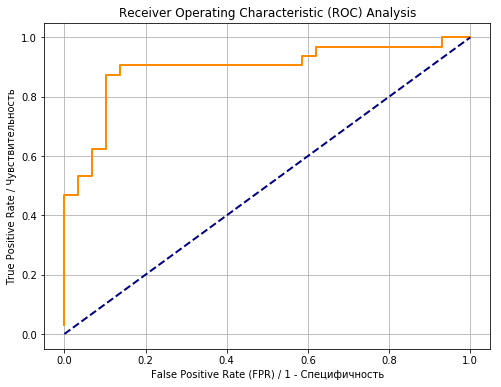

In [117]:
#Анализ ROC-AUC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr,tpr)
print(f"Площадь под ROC-кривой (AUC) для модели = {roc_auc:.4f}")

plt.figure(figsize=(8, 6), facecolor='white') 
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label=f'ROC-AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle = '--', label = 'Случайный классификатор (AUC) = 0.5')
plt.xlabel('False Positive Rate (FPR) / 1 - Специфичность')
plt.ylabel('True Positive Rate / Чувствительность')
plt.title('Receiver Operating Characteristic (ROC) Analysis')
plt.grid(True)
plt.show()

In [118]:
#Модель логистической регрессии. Построение матрицы ошибок
model = LogisticRegression(random_state = 77, max_iter = 1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Количество ошибок в классификации - {(y_test != y_pred).sum()} из {X_test.shape[0]}")
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(cm)

Количество ошибок в классификации - 8 из 61
Матрица ошибок:
[[25  4]
 [ 4 28]]


In [119]:
#Расчет показателей accuracy, precision, recall, F1-dcore
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность модели на тестовой выборке (Accuracy) = {accuracy:.4f}\n")
print(classification_report(y_test, y_pred))


Точность модели на тестовой выборке (Accuracy) = 0.8689

             precision    recall  f1-score   support

          0       0.86      0.86      0.86        29
          1       0.88      0.88      0.88        32

avg / total       0.87      0.87      0.87        61



Площадь под ROC-кривой (AUC) для модели = 0.9278


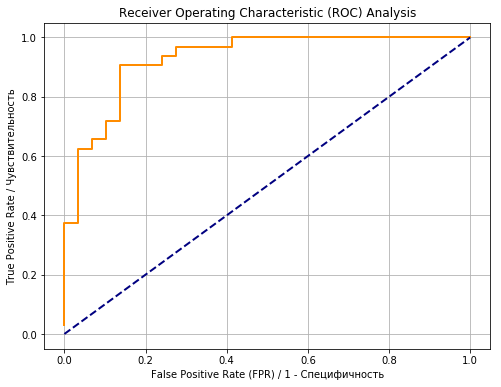

In [120]:
#Анализ ROC-AUC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr,tpr)
print(f"Площадь под ROC-кривой (AUC) для модели = {roc_auc:.4f}")

plt.figure(figsize=(8, 6), facecolor='white') 
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label=f'ROC-AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle = '--', label = 'Случайный классификатор (AUC) = 0.5')
plt.xlabel('False Positive Rate (FPR) / 1 - Специфичность')
plt.ylabel('True Positive Rate / Чувствительность')
plt.title('Receiver Operating Characteristic (ROC) Analysis')
plt.grid(True)
plt.show()

In [121]:
#Модель k-ближайщих соседей. Построение матрицы ошибок
k_best = 21
error_count = X_test.shape[0]
for k in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    if error_count > (y_test != y_pred).sum():
       error_count = (y_test != y_pred).sum()
       k_best = k
print(f"Наиболее оптимальный коэффициент k - {k_best}")
model = KNeighborsClassifier(n_neighbors=k_best)
model.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Количество ошибок в классификации при k={k_best} -> {(y_test != y_pred).sum()} из {X_test.shape[0]}")
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(cm)


Наиболее оптимальный коэффициент k - 11
Количество ошибок в классификации при k=11 -> 21 из 61
Матрица ошибок:
[[19 10]
 [11 21]]


In [122]:
#Расчет показателей accuracy, precision, recall, F1-dcore
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность модели на тестовой выборке (Accuracy) = {accuracy:.4f}\n")
print(classification_report(y_test, y_pred))


Точность модели на тестовой выборке (Accuracy) = 0.6557

             precision    recall  f1-score   support

          0       0.63      0.66      0.64        29
          1       0.68      0.66      0.67        32

avg / total       0.66      0.66      0.66        61



Площадь под ROC-кривой (AUC) для модели = 0.8066


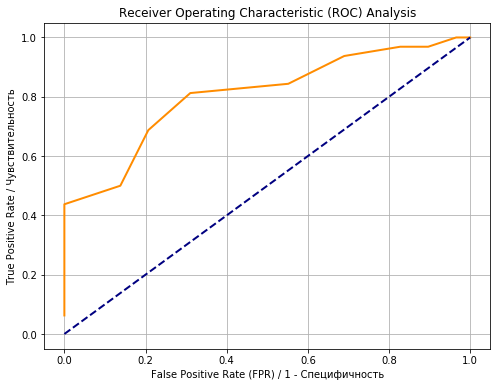

In [123]:
# Анализ ROC-AUC
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr,tpr)
print(f"Площадь под ROC-кривой (AUC) для модели = {roc_auc:.4f}")

plt.figure(figsize=(8, 6), facecolor='white') 
plt.plot(fpr, tpr, color = 'darkorange', lw=2, label=f'ROC-AUC = {roc_auc:.4f}')
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle = '--', label = 'Случайный классификатор (AUC) = 0.5')
plt.xlabel('False Positive Rate (FPR) / 1 - Специфичность')
plt.ylabel('True Positive Rate / Чувствительность')
plt.title('Receiver Operating Characteristic (ROC) Analysis')
plt.grid(True)
plt.show()